In [1]:
!pip install pdpbox
!pip install shap

     |████████████████████████████████| 57.7MB 74kB/s 
  Created wheel for pdpbox: filename=PDPbox-0.2.0-cp36-none-any.whl size=57690724 sha256=54cd68b51b683ff576dd9661efbffa936e2c08a22e59042a058bcaab4f43d66c
  Stored in directory: /root/.cache/pip/wheels/7d/08/51/63fd122b04a2c87d780464eeffb94867c75bd96a64d500a3fe
Successfully built pdpbox
     |████████████████████████████████| 327kB 1.7MB/s 
  Created wheel for shap: filename=shap-0.36.0-cp36-cp36m-linux_x86_64.whl size=456469 sha256=b0ce4f7b5ea88831c6ed606cea1b163d8d9bf79c1e6adf689352c3ea39cad598
  Stored in directory: /root/.cache/pip/wheels/fb/15/e1/8f61106790da27e0765aaa6e664550ca2c50ea339099e799f4
Successfully built shap


In [2]:
import pandas as pd

# Reading in data from fema:
# https://www.kaggle.com/fema/federal-disasters

df = pd.read_csv('database.csv', 
                 parse_dates=['Declaration Date'])

In [3]:
print(df.shape)
df.head()

(46185, 14)


,Declaration Number,Declaration Type,Declaration Date,State,County,Disaster Type,Disaster Title,Start Date,End Date,Close Date,Individual Assistance Program,Individuals & Households Program,Public Assistance Program,Hazard Mitigation Program
0,DR-1,Disaster,1953-05-02,GA,NaN,Tornado,Tornado,05/02/1953,05/02/1953,06/01/1954,Yes,No,Yes,Yes
1,DR-2,Disaster,1953-05-15,TX,NaN,Tornado,Tornado and Heavy Rainfall,05/15/1953,05/15/1953,01/01/1958,Yes,No,Yes,Yes
2,DR-3,Disaster,1953-05-29,LA,NaN,Flood,Flood,05/29/1953,05/29/1953,02/01/1960,Yes,No,Yes,Yes
3,DR-4,Disaster,1953-06-02,MI,NaN,Tornado,Tornado,06/02/1953,06/02/1953,02/01/1956,Yes,No,Yes,Yes
4,DR-5,Disaster,1953-06-06,MT,NaN,Flood,Floods,06/06/1953,06/06/1953,12/01/1955,Yes,No,Yes,Yes


In [4]:
# Pulling out dates on which an Emergency/Disaster was declared,
# and dropping multiple instances

emergencies = df['Declaration Date'].drop_duplicates()

assert len(emergencies) == emergencies.nunique()

In [5]:
# Creating DataFrame from data sourced from:
# https://www.kaggle.com/lsind18/daily-london-metal-fix-prices

# Parsing the date column and setting it as the index
df1 = pd.read_csv('londonfixes-current-clean_1990_.csv', 
                  parse_dates=['Date'], 
                  index_col='Date')

# Engineering features for daily relative percentage change of precious metals
df1['Percentage_Change_Gold'] = (df1['Gold PM Fix'] - df1['Gold AM Fix']) / df1['Gold AM Fix'] * 100

df1['Percentage_Change_Platinum'] = (df1['Platinum PM Fix'] - df1['Platinum AM Fix']) / df1['Platinum AM Fix'] * 100

df1['Percentage_Change_Palladium'] = (df1['Palladium PM Fix'] - df1['Palladium AM Fix']) / df1['Palladium AM Fix'] * 100

# Dropping columns, keeping only percentage change columns
df1 = df1.drop(['Silver Fix', 'Gold AM Fix', 'Gold PM Fix',
                           'Platinum AM Fix', 'Platinum PM Fix', 'Palladium AM Fix', 
                           'Palladium PM Fix'], axis=1)


# Creating DataFrame from the dates in which an Emergency/Disaster was declared
df2 = pd.DataFrame(emergencies)

# Setting the date column as the index
df2 = df2.set_index('Declaration Date')

# Engineering new categorical feature stating whether or not an Emergency was
# declared on a certain date
df2['Emergency_Declared'] = 'Yes'


# Creating DataFrame from Home Depot stock data sourced from:
# https://finance.yahoo.com/quote/HD/history?p=HD

# Parsing the date column and setting it as the index
df3 = pd.read_csv('HD.csv',
                  parse_dates=['Date'], 
                  index_col='Date')

# Engineering features for daily relative percentage change of Home Depot stock
df3['Percentage_Change_HD'] = (df3['Close'] - df3['Open']) / df3['Open'] * 100

# Dropping columns, keeping only percentage change column
df3 = df3.drop(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], axis=1)


# Creating DataFrame from Lowe's stock data sourced from:
# https://finance.yahoo.com/quote/LOW/history?p=LOW

# Parsing the date column and setting it as the index
df4 = pd.read_csv('LOW.csv',
                  parse_dates=['Date'], 
                  index_col='Date')

# Engineering features for daily relative percentage change of Lowe's stock
df4['Percentage_Change_LOW'] = (df4['Close'] - df4['Open']) / df4['Open'] * 100

# Dropping columns, keeping only percentage change column
df4 = df4.drop(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], axis=1)


# Creating DataFrame from Walmart stock data sourced from:
# https://finance.yahoo.com/quote/WMT/history?p=WMT

# Parsing the date column and setting it as the index
df5 = pd.read_csv('WMT.csv',
                  parse_dates=['Date'], 
                  index_col='Date')

# Engineering features for daily relative percentage change of Walmart stock
df5['Percentage_Change_WMT'] = (df5['Close'] - df5['Open']) / df5['Open'] * 100

# Dropping columns, keeping only percentage change column
df5 = df5.drop(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], axis=1)


# Creating DataFrame from Bank of America stock data sourced from:
# https://finance.yahoo.com/quote/BAC/history?p=BAC

# Parsing the date column and setting it as the index
df6 = pd.read_csv('BAC.csv',
                  parse_dates=['Date'], 
                  index_col='Date')

# Engineering features for daily relative percentage change of Bank of America 
# stock
df6['Percentage_Change_BAC'] = (df6['Close'] - df6['Open']) / df6['Open'] * 100

# Dropping columns, keeping only percentage change column
df6 = df6.drop(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], axis=1)


# Creating DataFrame from American International Group stock data sourced from:
# https://finance.yahoo.com/quote/AIG/history?p=AIG

# Parsing the date column and setting it as the index
df7 = pd.read_csv('AIG.csv',
                  parse_dates=['Date'], 
                  index_col='Date')

# Engineering features for daily relative percentage change of American
# International Group stock
df7['Percentage_Change_AIG'] = (df7['Close'] - df7['Open']) / df7['Open'] * 100

# Dropping columns, keeping only percentage change column
df7 = df7.drop(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], axis=1)


# Creating DataFrame from Halliburton stock data sourced from:
#https://finance.yahoo.com/quote/HAL/history?p=HAL

# Parsing the date column and setting it as the index
df8 = pd.read_csv('HAL.csv',
                  parse_dates=['Date'], 
                  index_col='Date')

# Engineering features for daily relative percentage change of Halliburton stock
df8['Percentage_Change_HAL'] = (df8['Close'] - df8['Open']) / df8['Open'] * 100

# Dropping columns, keeping only percentage change column
df8 = df8.drop(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], axis=1)

In [6]:
# Compiling the list of DataFrames to merge:

data_frames = [df1, df2, df3, df4, df5, df6, df7, df8]

In [7]:
import functools

# Merging all DataFrames on index date, keeping all values:
df_merged = functools.reduce(lambda  left,right: pd.merge(left, right, left_index=True, 
                                                right_index=True, how='outer'), 
                   data_frames)

In [8]:
# Filling null values in 'Emergency_Declared' column with 'No' 
df_merged['Emergency_Declared'].fillna(value='No', inplace=True)

# Dropping all rows with dates after '2017-02-15'
df_merged = df_merged[df_merged.index < '2017-02-15'] # <-- When FEMA data ends

# Dropping additional rows with NaN values
df_merged.dropna(inplace=True)

In [9]:
# Determining two values for each column that I will use to engineer a new feature:
# For all percentage changes that are positive in a single column, find the average
# of those values, and for all percentage changes that are negative, do the same. 

avg_gain_gold = df_merged['Percentage_Change_Gold'][df_merged['Percentage_Change_Gold'] > 0].mean()
avg_loss_gold = df_merged['Percentage_Change_Gold'][df_merged['Percentage_Change_Gold'] < 0].mean()

avg_gain_platinum = df_merged['Percentage_Change_Platinum'][df_merged['Percentage_Change_Platinum'] > 0].mean()
avg_loss_platinum = df_merged['Percentage_Change_Platinum'][df_merged['Percentage_Change_Platinum'] < 0].mean()

avg_gain_palladium = df_merged['Percentage_Change_Palladium'][df_merged['Percentage_Change_Palladium'] > 0].mean()
avg_loss_palladium = df_merged['Percentage_Change_Palladium'][df_merged['Percentage_Change_Palladium'] < 0].mean()

avg_gain_hd = df_merged['Percentage_Change_HD'][df_merged['Percentage_Change_HD'] > 0].mean()
avg_loss_hd = df_merged['Percentage_Change_HD'][df_merged['Percentage_Change_HD'] < 0].mean()

avg_gain_low = df_merged['Percentage_Change_LOW'][df_merged['Percentage_Change_LOW'] > 0].mean()
avg_loss_low = df_merged['Percentage_Change_LOW'][df_merged['Percentage_Change_LOW'] < 0].mean()

avg_gain_wmt = df_merged['Percentage_Change_WMT'][df_merged['Percentage_Change_WMT'] > 0].mean()
avg_loss_wmt = df_merged['Percentage_Change_WMT'][df_merged['Percentage_Change_WMT'] < 0].mean()

avg_gain_bac = df_merged['Percentage_Change_BAC'][df_merged['Percentage_Change_BAC'] > 0].mean()
avg_loss_bac = df_merged['Percentage_Change_BAC'][df_merged['Percentage_Change_BAC'] < 0].mean()

avg_gain_aig = df_merged['Percentage_Change_AIG'][df_merged['Percentage_Change_AIG'] > 0].mean()
avg_loss_aig = df_merged['Percentage_Change_AIG'][df_merged['Percentage_Change_AIG'] < 0].mean()

avg_gain_hal = df_merged['Percentage_Change_HAL'][df_merged['Percentage_Change_HAL'] > 0].mean()
avg_loss_hal = df_merged['Percentage_Change_HAL'][df_merged['Percentage_Change_HAL'] < 0].mean()

In [10]:
# Engineering a new feature for each column that will denote if a large change in
# percentage has occurred on that day.  I define 'large change' as follows:
# If the percentage change at a single observation is greater than the average of 
# the positive values in that column OR less than the average of the negative 
# values in that column, return 1. Otherwise, return 0.  A value of 1 indicates 
# a large change has occurred.  

df_merged['Large_Change_Gold'] = df_merged['Percentage_Change_Gold'].apply(lambda x: 1 if x < avg_loss_gold or x > avg_gain_gold else 0)

df_merged['Large_Change_Platinum'] = df_merged['Percentage_Change_Platinum'].apply(lambda x: 1 if x < avg_loss_platinum or x > avg_gain_platinum else 0)

df_merged['Large_Change_Palladium'] = df_merged['Percentage_Change_Palladium'].apply(lambda x: 1 if x < avg_loss_palladium or x > avg_gain_palladium else 0)

df_merged['Large_Change_HD'] = df_merged['Percentage_Change_HD'].apply(lambda x: 1 if x < avg_loss_hd or x > avg_gain_hd else 0)

df_merged['Large_Change_LOW'] = df_merged['Percentage_Change_LOW'].apply(lambda x: 1 if x < avg_loss_low or x > avg_gain_low else 0)

df_merged['Large_Change_WMT'] = df_merged['Percentage_Change_WMT'].apply(lambda x: 1 if x < avg_loss_wmt or x > avg_gain_wmt else 0)

df_merged['Large_Change_BAC'] = df_merged['Percentage_Change_BAC'].apply(lambda x: 1 if x < avg_loss_bac or x > avg_gain_bac else 0)

df_merged['Large_Change_AIG'] = df_merged['Percentage_Change_AIG'].apply(lambda x: 1 if x < avg_loss_aig or x > avg_gain_aig else 0)

df_merged['Large_Change_HAL'] = df_merged['Percentage_Change_HAL'].apply(lambda x: 1 if x < avg_loss_hal or x > avg_gain_hal else 0)

In [11]:
# Re-ordering DataFrame with target column at end

df_merged = df_merged[['Percentage_Change_Gold', 'Percentage_Change_Platinum', 
                       'Percentage_Change_Palladium', 'Percentage_Change_HD', 
                       'Percentage_Change_LOW', 'Percentage_Change_WMT', 
                       'Percentage_Change_BAC', 'Percentage_Change_AIG', 
                       'Percentage_Change_HAL', 'Large_Change_Gold', 
                       'Large_Change_Platinum', 'Large_Change_Palladium', 
                       'Large_Change_HD', 'Large_Change_LOW', 'Large_Change_WMT', 
                       'Large_Change_BAC', 'Large_Change_AIG', 'Large_Change_HAL', 
                       'Emergency_Declared']]

In [12]:
print(df_merged.shape)
df_merged.head()

(6590, 19)


,Percentage_Change_Gold,Percentage_Change_Platinum,Percentage_Change_Palladium,Percentage_Change_HD,Percentage_Change_LOW,Percentage_Change_WMT,Percentage_Change_BAC,Percentage_Change_AIG,Percentage_Change_HAL,Large_Change_Gold,Large_Change_Platinum,Large_Change_Palladium,Large_Change_HD,Large_Change_LOW,Large_Change_WMT,Large_Change_BAC,Large_Change_AIG,Large_Change_HAL,Emergency_Declared
1990-04-02,0.108696,-0.106157,-0.273437,1.104956,0.384591,0.265957,-0.649351,0.271741,0.555564,0,0,0,0,0,0,0,0,0,No
1990-04-03,0.053362,0.304750,0.116868,1.902179,2.682018,1.061008,0.653595,1.356851,1.377412,0,0,0,1,1,0,0,0,0,Yes
1990-04-04,0.000000,0.220727,-0.272692,-1.066694,-1.865648,0.261780,2.027027,-0.667556,-0.817442,0,0,0,0,1,0,1,0,0,No
1990-04-05,0.079344,0.020758,-0.506231,0.267387,-0.757527,1.044386,-3.986711,0.537628,0.000000,0,0,0,0,0,0,1,0,0,No
1990-04-06,-0.696727,-0.155925,-0.194175,-1.049853,-1.145062,-0.257732,-1.048951,-1.066664,0.000000,1,0,0,0,0,0,0,0,0,No


In [13]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6590 entries, 1990-04-02 to 2017-02-14
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Percentage_Change_Gold       6590 non-null   float64
 1   Percentage_Change_Platinum   6590 non-null   float64
 2   Percentage_Change_Palladium  6590 non-null   float64
 3   Percentage_Change_HD         6590 non-null   float64
 4   Percentage_Change_LOW        6590 non-null   float64
 5   Percentage_Change_WMT        6590 non-null   float64
 6   Percentage_Change_BAC        6590 non-null   float64
 7   Percentage_Change_AIG        6590 non-null   float64
 8   Percentage_Change_HAL        6590 non-null   float64
 9   Large_Change_Gold            6590 non-null   int64  
 10  Large_Change_Platinum        6590 non-null   int64  
 11  Large_Change_Palladium       6590 non-null   int64  
 12  Large_Change_HD              6590 non-null   int64  
 13  

In [14]:
# Splitting into target and feature matrix

target = 'Emergency_Declared'

y = df_merged[target]
X = df_merged.drop(columns=target)

In [15]:
# Based on the number of entries in the DataFrame, determining index
# cutoff value (using 80% for training, 20% for testing)

6590 * 0.80

5272.0

In [16]:
# Finding specific date at that index value:

df_merged.index[5272]

Timestamp('2011-09-29 00:00:00')

In [17]:
# Splitting into training and test sets:

cutoff = '2011-09-29'
mask = X.index < cutoff

X_train, y_train = X.loc[mask], y.loc[mask]
X_test, y_test = X.loc[~mask], y.loc[~mask]

In [18]:
# Sanity check

assert len(X_train) + len(X_test) == len(X)

In [19]:
# Establishing baseline (classification problem, so majority class)

baseline_acc = y_train.value_counts(normalize=True).max()

print('Baseline Accuracy:', baseline_acc)

Baseline Accuracy: 0.7701062215477997


In [20]:
# Self-note:  'No' is the majority class
# (shown in plot below as well):

y_train.value_counts()

No     4060
Yes    1212
Name: Emergency_Declared, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


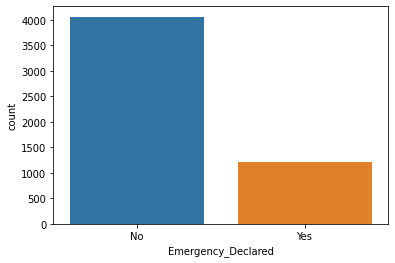

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.countplot(y_train);

In [22]:
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Building models

XGB_model = XGBClassifier(random_state=42, n_jobs=-1, 
                          n_estimators=400, max_depth=3)

Logistic_Regression_model = LogisticRegression()

Random_Forest_model = RandomForestClassifier(n_estimators=400,
                            random_state=42, max_depth=12)
 

In [23]:
# Fitting models to training data

XGB_model.fit(X_train, y_train)

Logistic_Regression_model.fit(X_train, y_train)

Random_Forest_model.fit(X_train, y_train)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=12, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=400,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [24]:
# Checking metrics

print('XGB: Training Accuracy:', XGB_model.score(X_train, y_train))
print('XGB: Testing Accuracy:', XGB_model.score(X_test, y_test))

print('Logistic Regression: Training Accuracy:', Logistic_Regression_model.score(X_train, y_train))
print('Logistic Regression: Testing Accuracy:', Logistic_Regression_model.score(X_test, y_test))

print('Random Forest: Training Accuracy:', Random_Forest_model.score(X_train, y_train))
print('Random Forest: Testing Accuracy:', Random_Forest_model.score(X_test, y_test))

XGB: Training Accuracy: 0.8110773899848255
XGB: Testing Accuracy: 0.8110773899848255
Logistic Regression: Training Accuracy: 0.7701062215477997
Logistic Regression: Testing Accuracy: 0.8141122913505311
Random Forest: Training Accuracy: 0.8177162367223065
Random Forest: Testing Accuracy: 0.8163884673748103


In [25]:
# XGB boost model was best fit, but Random Forest scored the highest 
# accuracy on the testing data.  

0.8156297420333839

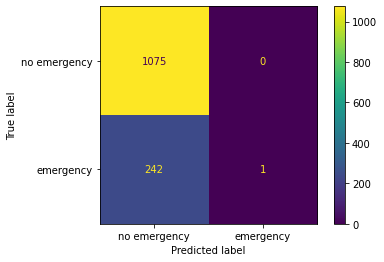

In [49]:
# Confusion Matrix

from sklearn.metrics import accuracy_score, plot_confusion_matrix, classification_report

plot_confusion_matrix(Random_Forest_model, X_test, y_test, # <-- Using test data
                      values_format='.0f',
                      display_labels=['no emergency', 'emergency']);

In [27]:
# Of the days that an emergency was declared, the model was only
# able to predict one day accurately.  

print(classification_report(y_test, Random_Forest_model.predict(X_test)))

              precision    recall  f1-score   support

          No       0.82      1.00      0.90      1075
         Yes       1.00      0.00      0.01       243

    accuracy                           0.82      1318
   macro avg       0.91      0.50      0.45      1318
weighted avg       0.85      0.82      0.73      1318



In [38]:
# Determining Permutation Importance

from sklearn.inspection import permutation_importance

perm_imp = permutation_importance(Random_Forest_model, X_test, y_test, random_state=42)

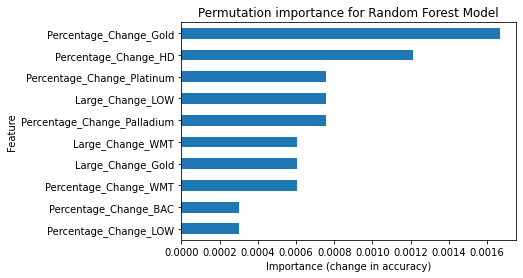

In [39]:
import matplotlib.pyplot as plt


# Putting results into DataFrame
data = {'importances_mean' : perm_imp['importances_mean'],
        'importances_std' : perm_imp['importances_std']}

df_perm = pd.DataFrame(data, index=X_test.columns)
df_perm.sort_values('importances_mean', ascending=True, inplace=True)

# Making a plot
df_perm['importances_mean'].tail(10).plot(kind='barh')
plt.xlabel('Importance (change in accuracy)')
plt.ylabel('Feature')
plt.title('Permutation importance for Random Forest Model');

In [30]:
# Communicate results:

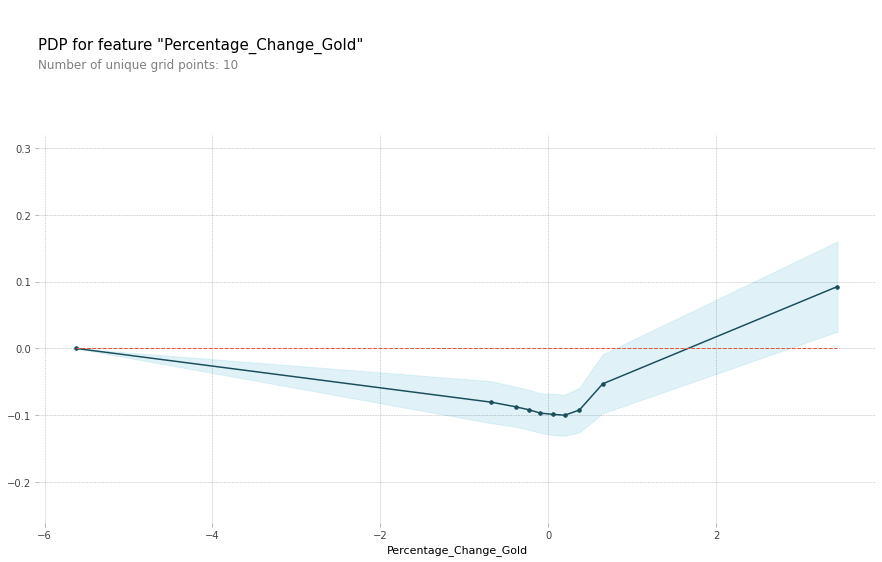

In [37]:
# Partial dependence plot

from pdpbox.pdp import pdp_isolate, pdp_plot

feature = 'Percentage_Change_Gold'

isolate = pdp_isolate(
    model=Random_Forest_model,
    dataset=X_test, 
    model_features=X_test.columns,
    feature=feature
)

pdp_plot(isolate, feature_name=feature);

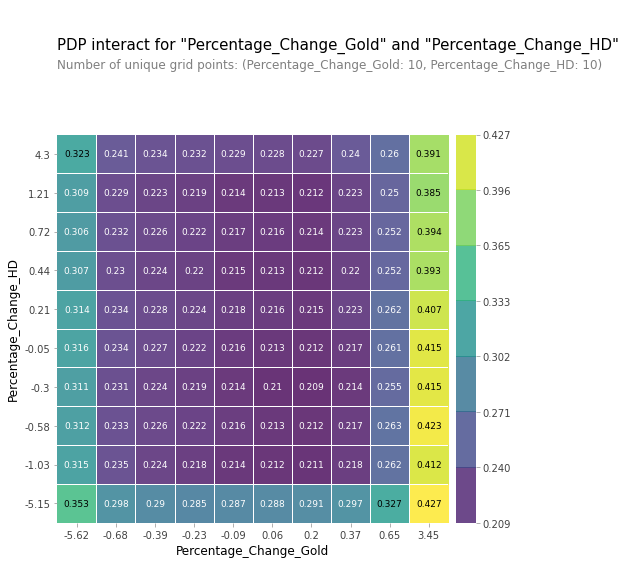

In [41]:
# Partial dependence with two features

from pdpbox.pdp import pdp_interact, pdp_interact_plot

features = ['Percentage_Change_Gold', 'Percentage_Change_HD']

interact = pdp_interact(
    model=Random_Forest_model,
    dataset=X_test, # <-- using validation data (or test data)
    model_features=X_test.columns,
    features=features
)

pdp_interact_plot(interact, plot_type='grid', feature_names=features);

In [44]:
# Shapley plot

row = X_test.iloc[[1]]
row

,Percentage_Change_Gold,Percentage_Change_Platinum,Percentage_Change_Palladium,Percentage_Change_HD,Percentage_Change_LOW,Percentage_Change_WMT,Percentage_Change_BAC,Percentage_Change_AIG,Percentage_Change_HAL,Large_Change_Gold,Large_Change_Platinum,Large_Change_Palladium,Large_Change_HD,Large_Change_LOW,Large_Change_WMT,Large_Change_BAC,Large_Change_AIG,Large_Change_HAL
2011-09-30,-0.552486,-1.755527,-2.073365,-1.14286,-1.62767,0.09644,-0.970874,-2.574345,-2.429671,1,1,1,0,1,0,0,1,1


In [47]:
XGB_model.predict(row)

array(['Yes'], dtype=object)

In [48]:
import shap

explainer = shap.TreeExplainer(XGB_model) # <-- Does not like pipelines
shap_values = explainer.shap_values(row)
shap.initjs()
shap.force_plot(
    base_value=explainer.expected_value,
    shap_values=shap_values,
    features=row
)